<center><h1>Restaurant Rating Prediction</h1></center>

<p><strong>Problem Statement : </strong>Given is a dataset containing the data about orders placed on zomato for the restaurants in Banglore. We have to predict the overall rating of the restaurant based on various factors.</p>

## Column Description

<ul>
<li>url: contains the url of the restaurant in the zomato website

<li>address: contains the address of the restaurant in Bengaluru

<li>name: contains the name of the restaurant

<li>online_order: whether online ordering is available in the restaurant or not

<li>book_table: table book option available or not

<li>rate: contains the overall rating of the restaurant out of 5

<li>votes: contains total number of rating for the restaurant as of the above mentioned date

<li>phone: contains the phone number of the restaurant

<li>location: contains the neighborhood in which the restaurant is located

<li>rest_type: restaurant type

<li>dish_liked: dishes people liked in the restaurant

<li>cuisines: food styles, separated by comma

<li>approx_cost(for two people): contains the approximate cost for meal for two people

<li>reviews_list: list of tuples containing reviews for the restaurant, each tuple

<li>menu_item: contains list of menus available in the restaurant

<li>listed_in(type): type of meal

<li>listed_in(city): contains the neighborhood in which the restaurant is listed
    </ul>

## Importing Required Libraries

In [1]:
import numpy as np                 # For Numerical Calculation              
import pandas as pd                # For Data Manipulation
import matplotlib.pyplot as plt    # For Data Visualization
import seaborn as sns              # For Data Visualization
%matplotlib inline

sns.set()         # Setting styles of the plot to Seaborn

In [2]:
# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

<br>

## Loading the Dataset

In [3]:
# Importing the Dataset
orders_df = pd.read_csv("zomato.csv")
orders_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<br>

## Checking the Size of the Dataset

In [4]:
orders_df.shape

(51717, 17)

<p><strong>Outcome : </strong>There are 51717 rows and 17 columns in our Dataset.

<br>

## Checking the columns in the Dataset

In [5]:
orders_df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

<p>Here, we can see the list of columns in which some of the columns are important and some are irrelevant in the context of the problem. So, further we drop and process the data.</p>

<br>

## Renaming Columns

In [6]:
# Renaming the columns approx_cost(for two people), listed(city) with approx_cost, area respectively
orders_df.rename(columns = {'approx_cost(for two people)' : 'approx_cost', 'listed_in(city)' : 'area'}, inplace = True)

<br>

## Data Cleaning
<p>Now, we clean our data by dropping the irrelevant columns, handling the wrong datatypes, handling the null values and the outliers.</p>

### Dropping Irrelevant Columns

In [7]:
# Here, url, address, menu_item, reviews_list, dish_liked, phone, listed_in(type) are irrelevant for 
# the problem's solution
orders_df.drop(['url', 'address','menu_item', 'reviews_list', 'dish_liked', 'phone', 'listed_in(type)'], axis = 1, inplace=True)
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


<br>

### Checking and Handling the Datatypes

In [8]:
# Checking the types of data present in the Dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


<strong>From above result, we can see that the columns { rate, location, rest_type, approx_cost, cuisines } either have null values, wrong datatypes or both.</strong> 

<br>

#### Rate Column

In [9]:
# Checking the unique values in the Rate column of the Dataset
orders_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

<p>Above result shows that there are many null values and garbage values also. 

<br>

In [10]:
# Replacing all the null values and garbage values and making it to be converted into numbers
orders_df['rate'] =  orders_df['rate'].str.replace("/5", "")
orders_df['rate'] =  orders_df['rate'].str.replace("nan", "NaN")
orders_df['rate'] =  orders_df['rate'].str.replace("NEW", "NaN")
orders_df['rate'] =  orders_df['rate'].str.replace("-", "NaN")
orders_df['rate'] =  orders_df['rate'].str.replace(" /5", "")
orders_df['rate'] =  orders_df['rate'].fillna(np.nan)
orders_df['rate'] =  orders_df['rate'].str.replace(" ", "")

In [11]:
# Verifying the results
orders_df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [12]:
# Changing the Datatype of Rate column from object to float
orders_df['rate'] = orders_df['rate'].astype(float)

<br>

#### Approx Cost Column

In [13]:
# Checking the unique values in the Approx Cost column of the Dataset
orders_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

<p>Above, we can see that there are null values and numeric values but in the object type.</p>

<br>

In [14]:
# Replacing the null values and make it able to convert 
orders_df['approx_cost'] =  orders_df['approx_cost'].str.replace("nan", "NaN")
orders_df['approx_cost'] =  orders_df['approx_cost'].fillna('NaN')
orders_df['approx_cost'] =  orders_df['approx_cost'].str.replace(",", "")

In [15]:
# Verifying the Results
orders_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [16]:
# Changing the Datatype of the column from Object to Float
orders_df['approx_cost'] = orders_df['approx_cost'].astype(float)

In [17]:
# Again, checking the datatypes of columns to verify
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


<br>

### Checking for Null Values

In [18]:
# Checking the number of null values columnwise
orders_df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [19]:
# Checking of Percentage of Null values in Each Column
(orders_df.isna().sum() / orders_df.shape[0]) * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

<p>Here, we can see that columns location, rest_type, cuisines, approx_cost have less number of null values as compared to rate column. So, we can drop that null values.</p>

<br>

In [20]:
# Here, we dropping the null values from the columns having lesser number of null values
orders_df = orders_df[orders_df["location"].notna()]
orders_df = orders_df[orders_df["rest_type"].notna()]
orders_df = orders_df[orders_df["cuisines"].notna()]
orders_df = orders_df[orders_df["approx_cost"].notna()]

# Verifying the results
orders_df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

<br>

#### Handling Null values in Rate Column
<p>As the rate column has greater number of null values, dropping them leads to losing the a large amount of data. So, instead of dropping it, we will impute with either mean, mode or median.

In [21]:
# Checking all the statistics of Rate column
orders_df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [22]:
# For imputing the values, we will check for outliers
q1 = orders_df['rate'].quantile(0.25)
q3 = orders_df['rate'].quantile(0.75)

iqr = q3 - q1

lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

outliers = len(orders_df[(orders_df['rate'] < lower_range) | (orders_df['rate'] > upper_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


<p>Here, we can see that 183 rows have outliers, but as we know that rating are always in the range from 1.0 to 5.0. So, using the mean is not appropriate. Therefore, we will impute with median.</p>

<br>

In [23]:
# Imputing the null values with median of rate column
orders_df['rate'] = orders_df['rate'].fillna(orders_df['rate'].median())

# Verifying the Results
orders_df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [24]:
# After dropping the values, we will reset the index
orders_df.reset_index(inplace=True)
orders_df.drop(['index'], axis=1, inplace=True)

<br>

## Data Visualization
<p>Now, we visualize our data based on different parameters to understand the relations and some insights from out dataset.

### No. of orders vs Restaurants

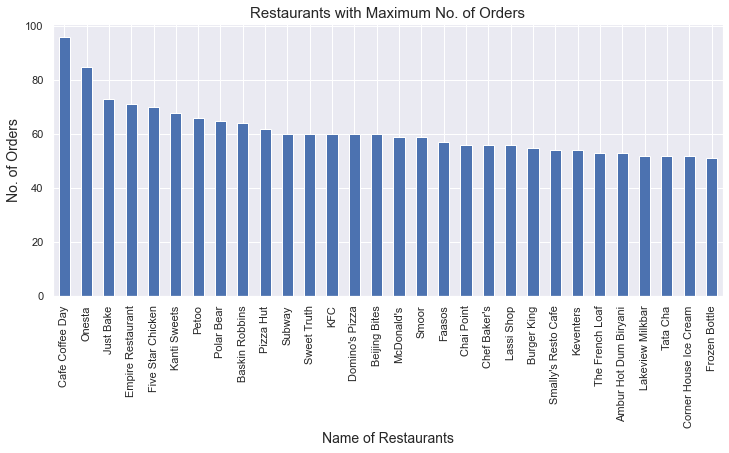

In [25]:
# Checking for the Restaurants got higher number of orders
plt.figure(figsize = (12,5))
data = orders_df['name'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum No. of Orders", fontsize=15)
plt.show()

<p>Above Bar chart shows that the Cafe Coffee Day and Onesta got slightly higher number of orders as compared to others restaurants while others got approximately same number of orders.</p>

<br>

### Number of Restaurants having Online Order Facility

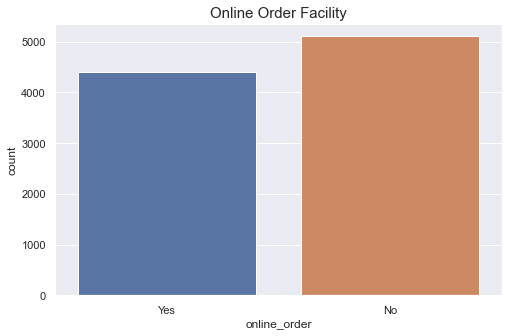

In [26]:
# Checking the number of restaurants having Online Order Facility
data = orders_df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize = (8,5))
ax = sns.countplot(x="online_order", data=data).set_title('Online Order Facility',fontsize = 15)
plt.show()

From above chart, we can see that only 4397 restaurants in Banglore have <strong>Online Order Facility</strong> which less than the half of the restaurants.

<br>

### Number of restaurants having Prebooking Table Facility

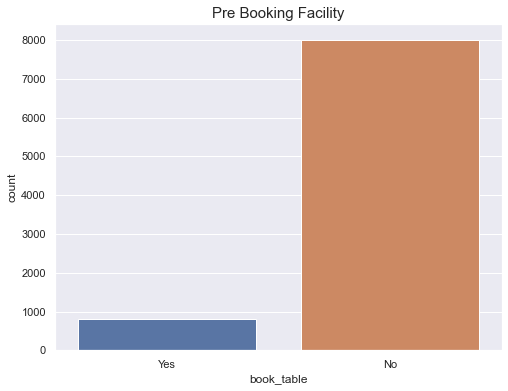

In [27]:
# Checking the number of restaurants having Prebooking Table Facility
data = orders_df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (8,6))
ax = sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 15)
plt.show()

From above chart, we can see that Most of the restaurants in Banglore doesn't have <strong>Pre Booking Facility</strong> which is about 8011 restaurants and only 820 restaurants having these facility.

<br>

### Top Locations got Higher Number of Orders

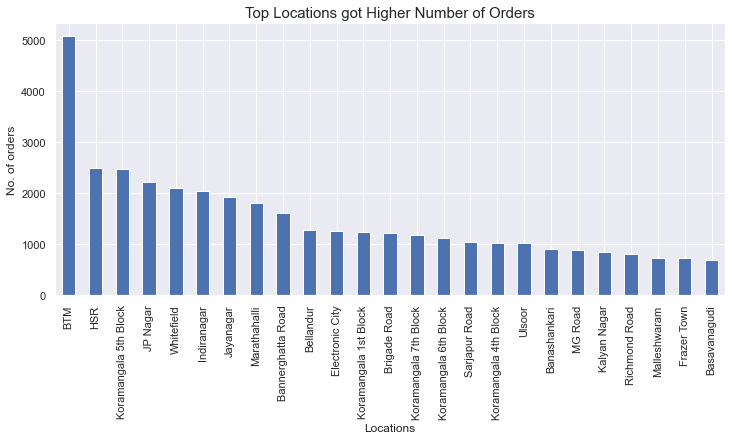

In [28]:
# Checking top Locations got Higher Number of Orders
plt.figure(figsize = (12,5))
data = orders_df.location.value_counts()[0:25]
data.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('No. of orders')
plt.title ('Top Locations got Higher Number of Orders', size = 15)
plt.show()

Above visualization shows that <strong>Location BTM</strong> got higher number of orders among all others locations. Also, <strong>HSR and Koramangala 5th Block Location</strong> also got good number of order which is approximately half of the orders of BTM Location.

<br>

### Most Common Ratings for orders

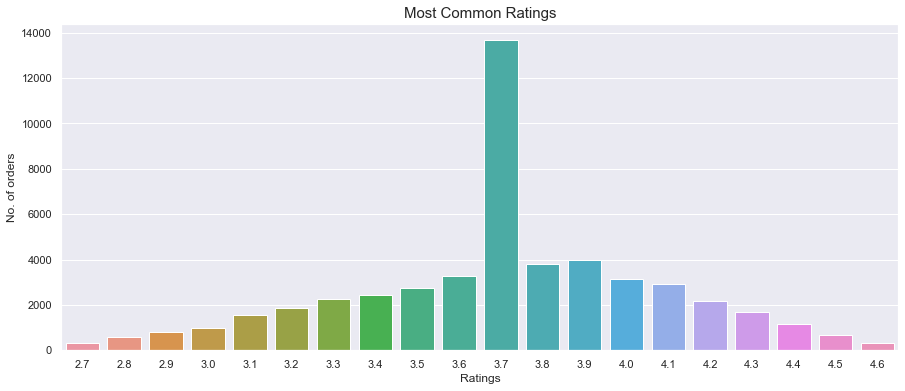

In [29]:
# Checking the most Common ratings for orders
data = orders_df.rate.value_counts().reset_index()[0:20]

plt.figure(figsize = (15,6))
sns.barplot(x = data['index'], y = data['rate'])
plt.xlabel('Ratings')
plt.ylabel('No. of orders')
plt.title ('Most Common Ratings', size = 15)
plt.show()

We can see that maximum number of orders got <strong>3.7 rating</strong> for their restaurants.

<br>

### Common Approximate Costs for meal of two people 

In [30]:
data = pd.DataFrame(orders_df["approx_cost"].value_counts().reset_index()[:20])
data.columns = ['approx_cost', 'count']
data = data.set_index('approx_cost')

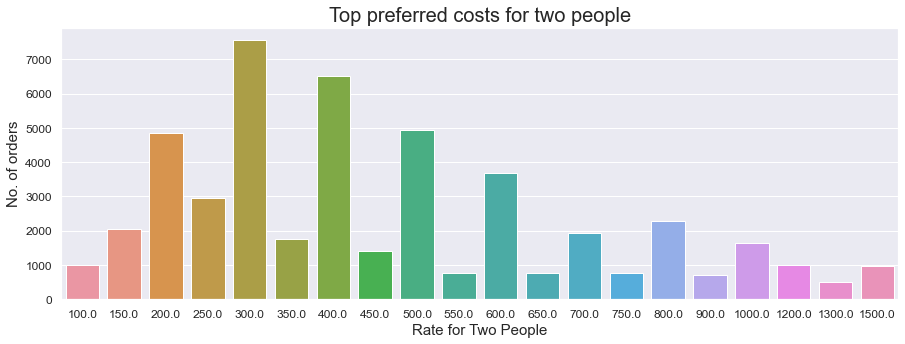

In [31]:
plt.figure(figsize = (15, 5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for Two People', size=15)
plt.ylabel('No. of orders', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top preferred costs for two people', size = 20)
plt.show()

### Restaurant Type vs No. of orders

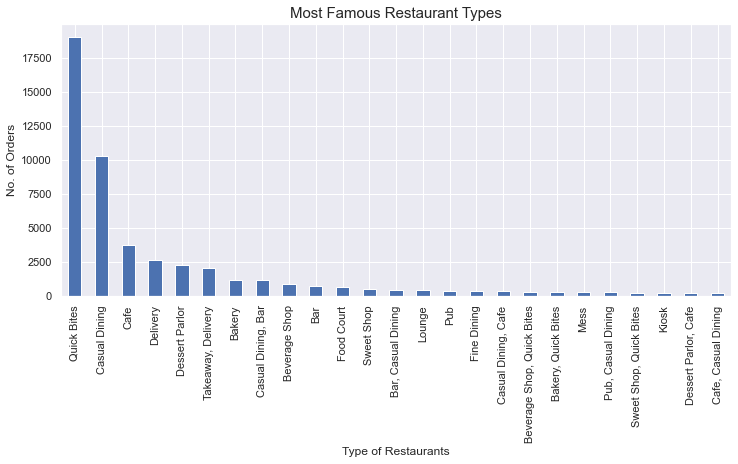

In [32]:
plt.figure(figsize=(12,5))
ax = orders_df.rest_type.value_counts()[:25]
ax.plot(kind='bar')
plt.title("Most Famous Restaurant Types",fontsize=15)
plt.xlabel("Type of Restaurants")
plt.ylabel("No. of Orders")
plt.show()

### Most famous Cusines among People

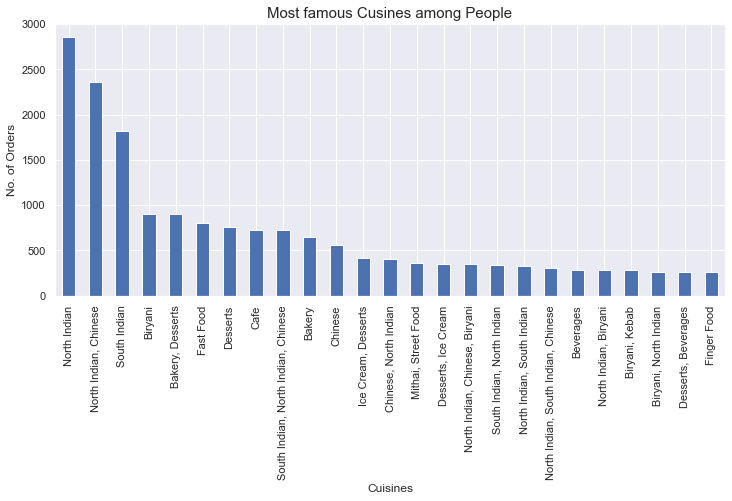

In [33]:
plt.figure(figsize=(12,5))
ax = orders_df.cuisines.value_counts()[:25].plot(kind='bar')
plt.title("Most famous Cusines among People",fontsize=15)
plt.xlabel("Cuisines")
plt.ylabel ("No. of Orders")
plt.show()

### Top Locations with Most Number of Restaurants

In [34]:
top_areas = pd.DataFrame(orders_df.groupby(by='location')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)

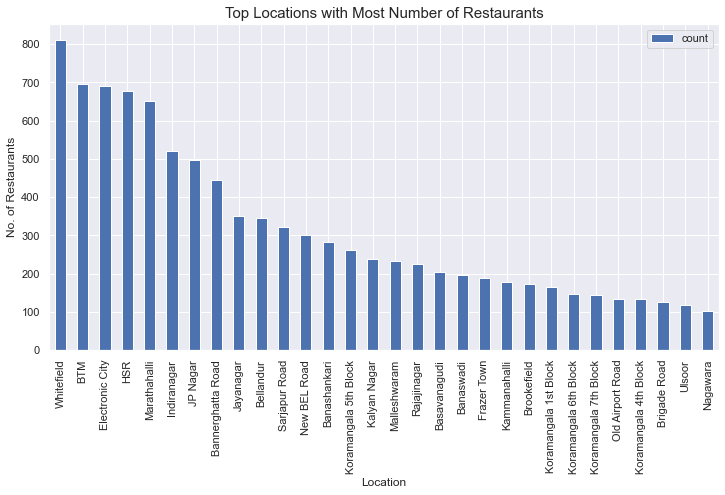

In [35]:
plt.rcParams['figure.figsize'] = (12,6)
ax = top_areas[0:30].plot(kind='bar')
plt.xlabel('Location', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

### Top Areas with Most Number of Restaurants

In [36]:
top_areas = pd.DataFrame(orders_df.groupby(by='area')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)

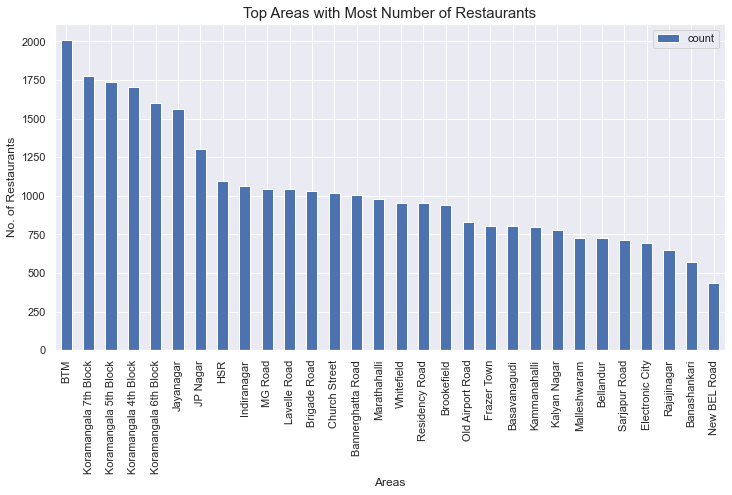

In [37]:
plt.rcParams['figure.figsize'] = (12,6)
ax = top_areas[0:30].plot(kind='bar')
plt.xlabel('Areas', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Areas with Most Number of Restaurants', size = 15)
plt.show()

## Encoding Columns

### Online Order Column

In [38]:
orders_df['online_order'] = orders_df['online_order'].replace({"Yes": 1, "No" : 0})
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari



<br>

### Book Table Column

In [39]:
orders_df['book_table'] = orders_df['book_table'].replace({"Yes": 1, "No" : 0})
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


<br>

### Rest Type Column

In [94]:
rest_df = pd.DataFrame(orders_df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Lounge,Kiosk,Food Truck,Irani Cafee,Confectionery,Cafe,Microbrewery,Dhaba,Takeaway,...,Dessert Parlor,Club,Quick Bites,Bhojanalya,Casual Dining,Fine Dining,Mess,Sweet Shop,Food Court,Bakery
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [42]:
rest_df.head()

,rest_type,Lounge,Kiosk,Food Truck,Irani Cafee,Confectionery,Cafe,Microbrewery,Dhaba,Takeaway,...,Dessert Parlor,Club,Quick Bites,Bhojanalya,Casual Dining,Fine Dining,Mess,Sweet Shop,Food Court,Bakery
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
rest_df.drop(['rest_type'], axis = 1, inplace=True)
rest_df.head()

,Lounge,Kiosk,Food Truck,Irani Cafee,Confectionery,Cafe,Microbrewery,Dhaba,Takeaway,Pop Up,...,Dessert Parlor,Club,Quick Bites,Bhojanalya,Casual Dining,Fine Dining,Mess,Sweet Shop,Food Court,Bakery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<br>

### Cuisines Column

In [96]:
cuisines_df = pd.DataFrame(orders_df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cs in unique_cuisines:
    cuisines_df[cs] = 0   
    
cuisines_df.head()

,cuisines,Rajasthani,Mediterranean,Desserts,Burmese,Tibetan,Belgian,Seafood,Raw Meats,Greek,...,Sri Lankan,Oriya,Mangalorean,Singaporean,Maharashtrian,Mexican,British,Pizza,Biryani,Chettinad
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
corrected_cuisines = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe")
        
    if "Bakery" in i:
        i.remove("Bakery")
        
    corrected_cuisines.append(list(set(i)))

In [46]:
count = 0
for i in corrected_cuisines:
    cuisines_df.loc[count, i] = int(1)
    count+=1

In [47]:
cuisines_df.head()

,cuisines,Rajasthani,Mediterranean,Desserts,Burmese,Tibetan,Belgian,Seafood,Raw Meats,Greek,...,Sri Lankan,Oriya,Mangalorean,Singaporean,Maharashtrian,Mexican,British,Pizza,Biryani,Chettinad
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Rajasthani,Mediterranean,Desserts,Burmese,Tibetan,Belgian,Seafood,Raw Meats,Greek,African,...,Sri Lankan,Oriya,Mangalorean,Singaporean,Maharashtrian,Mexican,British,Pizza,Biryani,Chettinad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

### Location Column

In [49]:
location_df = orders_df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

### Area Column

In [50]:
area_df = orders_df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data_with_location = pd.concat([orders_df, rest_df, cuisines_df, location_df], axis = 1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data_with_area = pd.concat([orders_df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)

## Feature Selection

In [54]:
X1 = data_with_location.drop("rate", axis = 1).values
Y1 = data_with_location["rate"].values

print("X = ", X1)
print()
print("Y = ", Y1)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   1. 236. ...   0.   0.   0.]
 [  0.   0.  13. ...   0.   0.   0.]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [55]:
X2 = data_with_area.drop("rate", axis = 1).values
Y2 = data_with_area["rate"].values

print("X = ", X2)
print()
print("Y = ", Y2)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   1. 236. ...   0.   0.   1.]
 [  0.   0.  13. ...   0.   0.   1.]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


<br>

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

In [57]:
# Extracting Important features from data_with_location Dataframe
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(X1, Y1)
print(imp_features1.feature_importances_)

[1.72201240e-02 1.66288792e-01 2.91526033e-01 4.78639142e-02
 3.38261235e-03 3.59884285e-04 7.68323814e-05 8.34300297e-07
 1.16727982e-05 1.26065190e-02 7.93434810e-04 1.95504501e-04
 2.98404571e-03 4.34206751e-19 1.84914889e-03 2.70630089e-03
 5.38780550e-03 4.64820566e-06 1.18485281e-03 3.58604220e-03
 8.24050574e-05 1.01435928e-02 8.02783468e-07 1.05383336e-02
 5.08529809e-04 1.01682146e-03 6.67514493e-04 3.46686158e-03
 2.79911795e-03 4.94108693e-04 1.55749461e-03 2.09744063e-02
 2.14432636e-04 1.44866814e-03 2.72850064e-06 3.97664496e-03
 6.61532845e-06 1.76355597e-05 3.40712274e-04 1.11831374e-05
 5.72273807e-03 3.12714039e-05 2.04161025e-04 1.53783038e-03
 2.90339834e-04 1.83173125e-05 6.94538836e-05 1.26150942e-06
 4.31227372e-03 1.21233876e-04 2.32084823e-06 3.49641136e-04
 9.04569051e-05 2.77080256e-03 6.09804081e-06 5.22498009e-06
 1.07343650e-05 2.04241093e-03 1.69031579e-03 7.41115157e-05
 3.43684062e-04 3.52415173e-03 1.17238067e-04 3.88214692e-04
 3.77328874e-03 2.422410

<AxesSubplot:>

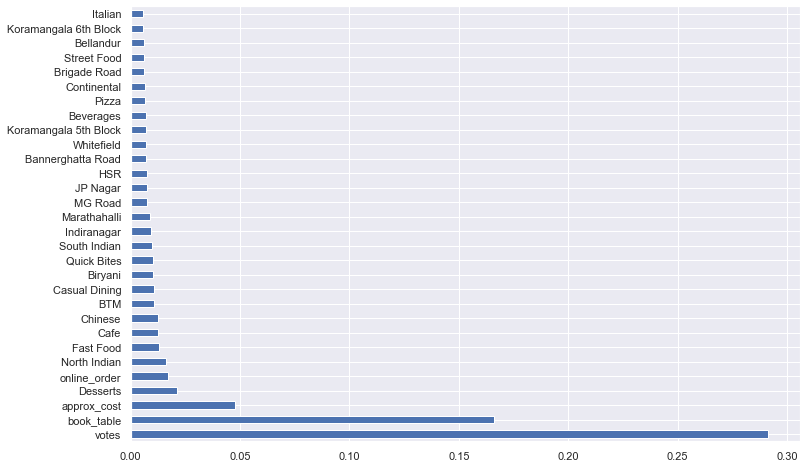

In [58]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(30).plot(kind = "barh")

In [59]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(X2, Y2)
print(imp_features2.feature_importances_)

[2.16069941e-02 1.69033969e-01 3.17357430e-01 7.34393504e-02
 4.20848500e-03 5.01136868e-04 2.05492713e-04 3.16307507e-06
 1.82563314e-05 1.38178063e-02 9.20844118e-04 2.02489988e-04
 3.81231020e-03 6.25050375e-17 2.75929492e-03 3.27605814e-03
 6.47629297e-03 1.79769991e-05 1.69066795e-03 3.79496022e-03
 9.48646086e-05 1.22342769e-02 8.13653378e-07 1.18532944e-02
 8.40673033e-04 1.30821348e-03 9.97653414e-04 3.71210900e-03
 4.13357918e-03 6.81179413e-04 1.76255811e-03 2.15240103e-02
 2.81587611e-04 1.99293854e-03 3.59694346e-06 5.45040901e-03
 1.57480140e-05 3.69693349e-05 3.98231294e-04 1.76455341e-05
 1.04976971e-02 5.18397880e-05 2.27900154e-04 1.91200408e-03
 3.99971206e-04 2.45148433e-05 7.38873751e-05 5.20320561e-06
 5.20078954e-03 3.21679865e-04 7.38660270e-07 4.86965984e-04
 1.47159294e-04 3.45140264e-03 2.50321569e-05 4.54477367e-06
 1.79361790e-05 2.74264609e-03 2.51414612e-03 7.35176546e-05
 5.12053705e-04 4.76465862e-03 1.94187122e-04 4.17054988e-04
 5.24023348e-03 3.228616

<AxesSubplot:>

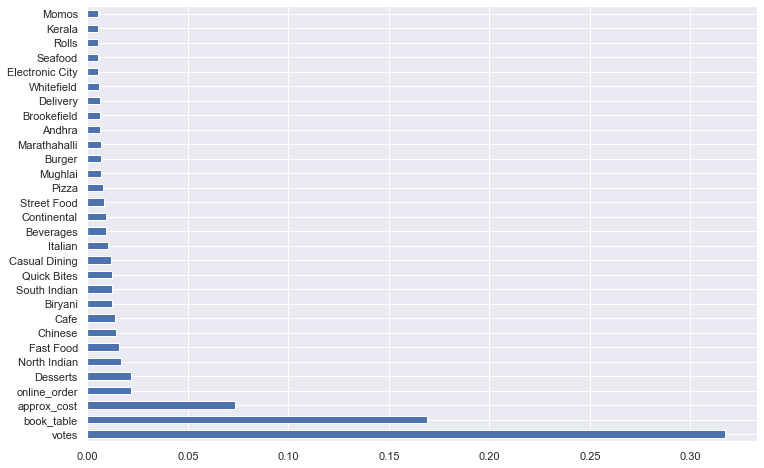

In [60]:
plt.figure(figsize = (12, 8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(30).plot(kind = "barh")

<br>

## Train Test Splitting of Data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [63]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=45)

<br>

## Importing ML Models

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Linear Regression

#### For data_with_location

In [65]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [66]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:100]

array([3.59842095, 3.79314729, 3.58246313, 3.48453781, 3.54911858,
       3.86078185, 3.57360405, 3.49362775, 3.86837198, 3.53854682,
       3.53894707, 3.66695723, 3.52999025, 3.61098495, 4.13777133,
       3.38109923, 3.79516245, 4.33883224, 3.50354697, 3.429606  ,
       3.45267673, 3.47351886, 3.84281261, 3.61792553, 3.51014983,
       3.53499089, 3.84186274, 3.78805962, 3.64354086, 3.51003124,
       3.63136543, 3.68449124, 3.94075469, 3.7367096 , 3.50586451,
       3.46090123, 4.49197891, 3.5768909 , 3.44830891, 3.79047545,
       3.61026277, 3.80753047, 3.55868624, 3.77055884, 3.4899659 ,
       3.60305986, 3.62821693, 3.49645813, 4.43527374, 4.16001406,
       3.51686224, 4.42523589, 3.63541475, 3.43397489, 3.61012108,
       3.72063299, 3.59530734, 3.54345125, 3.62358271, 3.52398522,
       3.76933367, 3.82226402, 3.48584428, 3.65376135, 4.02413128,
       4.30118549, 3.48148102, 3.61607414, 3.76684806, 3.50513566,
       3.66760143, 3.47916749, 3.60942462, 3.53674262, 3.44939

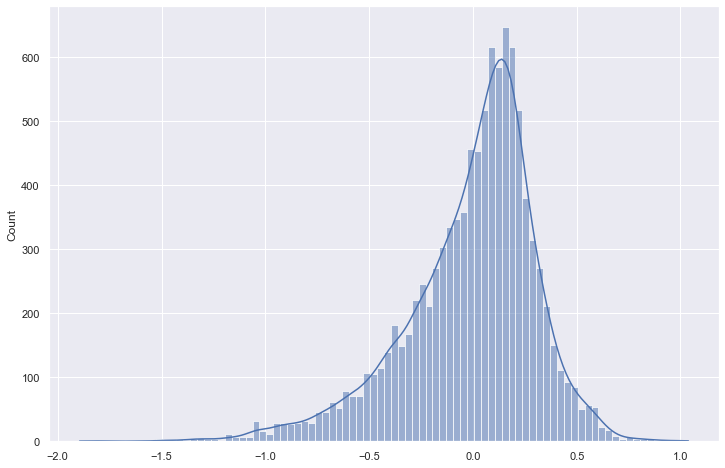

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()

#### For data_with_area

In [68]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [69]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:100]

array([3.51048882, 3.64624727, 3.91010291, 3.5310687 , 3.63902146,
       3.50307539, 4.12011187, 3.80908364, 3.67520392, 3.50085444,
       3.60862335, 3.70999879, 3.67316422, 4.08726229, 3.65341947,
       3.65980031, 4.04504739, 3.58494806, 4.14987018, 3.58862444,
       3.64562671, 3.83260972, 3.50762822, 3.68342688, 3.70324063,
       3.95263685, 4.13305177, 3.46835315, 3.47583025, 3.63654953,
       3.72160944, 3.69534413, 3.8050545 , 3.77048172, 3.53513794,
       3.48923858, 4.28697051, 3.50903821, 3.75349993, 3.69338207,
       3.70443475, 3.60136421, 4.05891546, 3.61024504, 3.55934397,
       3.81244436, 3.81456064, 3.50414448, 3.43098915, 3.51496927,
       3.50303322, 3.82541065, 3.83833245, 3.52617849, 3.85815489,
       3.84711823, 3.57644781, 3.67179775, 3.55948445, 3.57708213,
       3.63459424, 4.12782089, 3.59805804, 3.48051497, 4.20969075,
       3.78838586, 3.97159693, 3.64282754, 3.63616819, 3.78291687,
       3.67089778, 3.88598112, 3.53337802, 3.78804375, 3.50613

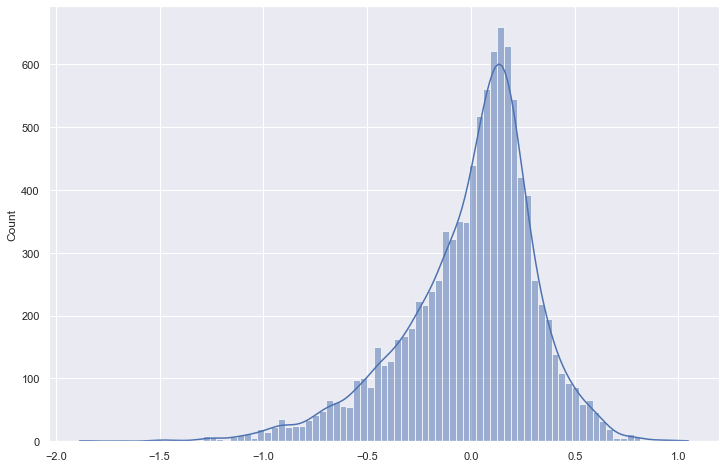

In [70]:
plt.figure(figsize=(12,8))
sns.histplot(Y2_test - Y_lr2, kde=True)
plt.show()

### Random Forest Regression

#### For data_with_location

In [71]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [72]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.2212    , 3.509125  , 3.7       , 3.21661538, 3.2525    ,
       4.099     , 3.599     , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.344     ,
       3.25968333, 3.9399    , 4.2       , 3.7       , 3.2       ,
       3.1495    , 3.7       , 3.7       , 3.74256667, 3.59856667,
       3.8442    , 3.7       , 4.3       , 3.5       , 3.374     ,
       3.505     , 3.32411905, 4.2       , 4.403     , 3.986     ,
       3.21133333, 4.43      , 3.4456    , 3.7       , 4.102     ,
       3.78      , 3.7       , 3.6255    , 4.171     , 3.40475   ,
       3.63      , 3.972     , 3.276     , 4.4       , 4.201     ,
       3.8       , 4.2       , 3.7       , 3.007     , 3.7       ,
       3.891     , 3.3       , 3.797     , 3.7       , 3.7       ,
       3.70233333, 3.892     , 2.877     , 3.65893333, 4.        ,
       4.1064619 , 3.2863    , 3.113     , 3.97      , 3.314     ,
       3.7       , 3.687     , 3.618     , 3.3425    , 3.54033

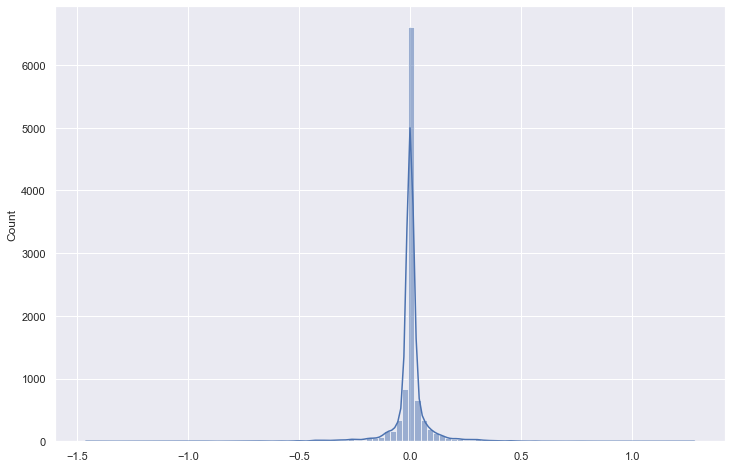

In [73]:
plt.figure(figsize=(12,8))
sns.histplot(Y1_test - Y_rf1, kde=True, bins=100)
plt.show()

#### For data_with_area

In [74]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [75]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.7       , 4.1       , 4.3       , 3.271     , 3.362     ,
       3.7       , 4.2       , 4.189     , 3.122     , 3.787     ,
       3.453     , 3.7       , 3.7       , 4.183     , 3.676     ,
       3.298     , 4.409     , 3.735     , 4.269     , 3.7       ,
       4.186     , 3.999     , 3.313     , 3.9       , 3.7       ,
       4.287     , 4.104     , 3.481     , 3.7       , 3.7       ,
       3.604     , 3.887     , 4.086     , 3.894     , 3.7       ,
       3.186     , 4.504     , 3.175     , 3.065     , 3.496     ,
       2.849     , 3.98      , 4.523     , 3.7       , 3.7       ,
       4.105     , 3.92      , 2.907     , 3.59825   , 3.53      ,
       2.962     , 4.05      , 3.7       , 3.003     , 3.683     ,
       3.9       , 3.578     , 3.779     , 3.7       , 3.398     ,
       3.414     , 4.2       , 3.942     , 3.7       , 4.4       ,
       4.002     , 4.05      , 3.711     , 3.441     , 3.875     ,
       3.1606    , 4.1       , 3.7       , 3.695     , 3.772  

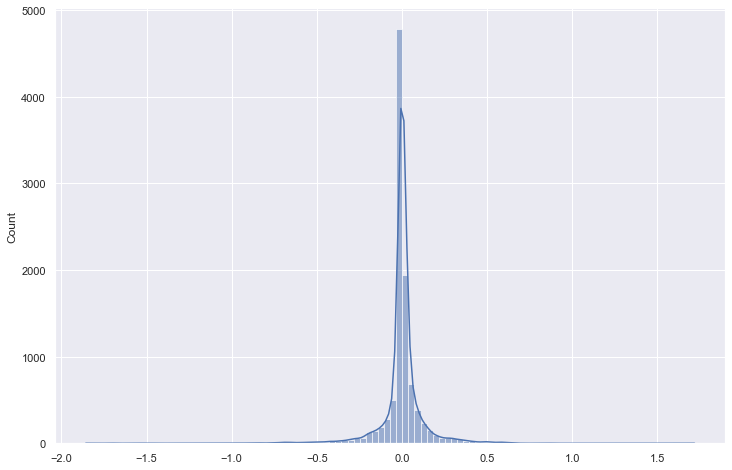

In [76]:
plt.figure(figsize=(12,8))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

### Decision Tree Regressor

#### For data_with_location

In [77]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [78]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.2       , 3.        , 3.7       , 3.2       , 3.2       ,
       4.1       , 3.6       , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.4       ,
       3.2       , 4.05      , 4.2       , 3.7       , 3.2       ,
       3.1       , 3.7       , 3.7       , 3.75      , 3.6       ,
       3.85      , 3.7       , 4.3       , 3.5       , 3.4       ,
       3.5       , 3.43333333, 4.2       , 4.4       , 4.        ,
       3.1       , 4.4       , 3.5       , 3.7       , 4.1       ,
       3.8       , 3.7       , 3.5       , 3.9       , 3.        ,
       3.6       , 4.        , 3.3       , 4.4       , 4.2       ,
       3.8       , 4.2       , 3.7       , 3.        , 3.7       ,
       3.9       , 3.3       , 3.9       , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.9       , 3.7       , 4.        ,
       4.1       , 3.3       , 3.1       , 4.        , 3.3       ,
       3.7       , 3.7       , 3.6       , 3.5       , 3.6    

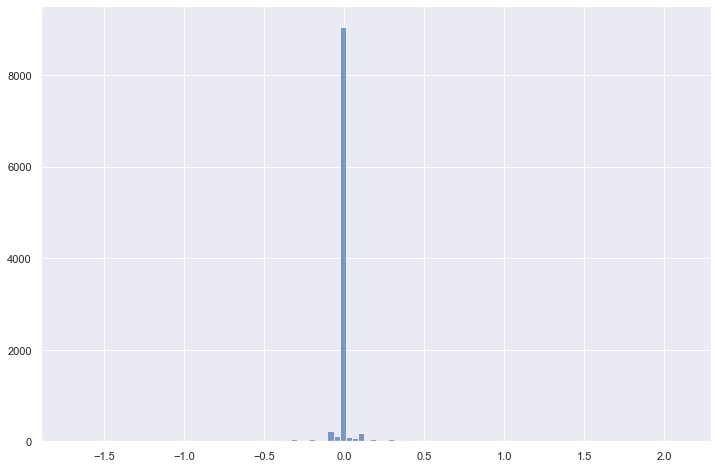

In [79]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test - Y_dt1, bins=100, alpha=0.7)
plt.show()

#### For data_with_area

In [80]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [81]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.7, 4.1, 4.3, 3. , 3.5, 3.7, 4.2, 4.2, 3.1, 3.9, 3.7, 3.7, 3.7,
       4.2, 3.7, 3.3, 4.4, 2.8, 4.3, 3.7, 4.2, 4. , 3.2, 3.9, 3.7, 4.3,
       4.1, 3.5, 3.7, 3.7, 3.6, 3.9, 4.1, 3.9, 3.7, 3. , 4.5, 3.1, 2.8,
       3.5, 2.8, 3.8, 4.6, 3.7, 3.7, 4.6, 3.9, 2.7, 3.7, 3.5, 3.1, 4.1,
       3.7, 3. , 3.6, 3.9, 3.6, 3.9, 3.7, 3.4, 3.4, 4.2, 4. , 3.7, 4.4,
       4. , 4. , 3.7, 3.4, 4.1, 3.1, 4.1, 3.7, 3.7, 3.9, 4.8, 3.4, 3.9,
       4.1, 4. , 3.6, 3.7, 4.5, 3.7, 3.8, 3.8, 3.5, 4.3, 4.5, 3.1, 3.7,
       3.3, 3.8, 3.9, 3.2, 4. , 3.7, 3.7, 3.3, 3.9])

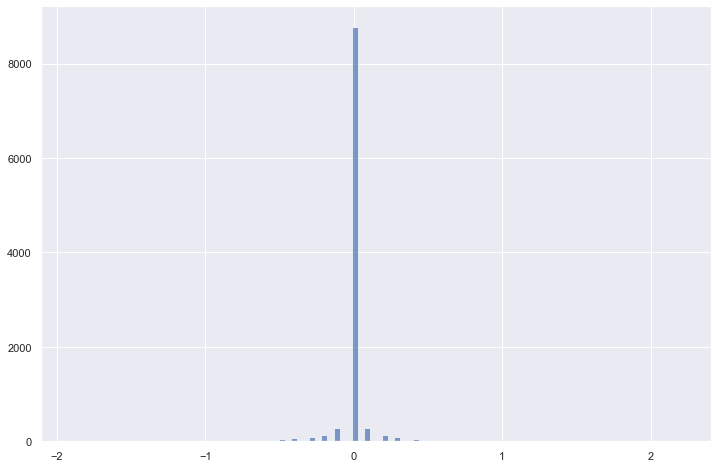

In [82]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

## Model Evaluation

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression Model 

#### for data_with_location

In [84]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.35719946892107624
Coefficient of Determination for test data :  0.35815519104483684
Mean Absolute Error :  0.24026687273293618
Mean Squared Error :  0.1012131484570824
Root Mean Squared Error :  0.3181401396508815
R2 Score :  0.35815519104483684


#### for data_with_area

In [85]:
mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.34422351544164753
Coefficient of Determination for test data :  0.34420175633557104
Mean Absolute Error :  0.2430766976157529
Mean Squared Error :  0.1027830022640604
Root Mean Squared Error :  0.32059788250089927
R2 Score :  0.34420175633557104


### Random Forest Regression Model 

#### for data_with_location

In [86]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.990287008661007
Coefficient of Determination for test data :  0.9423480906130008
Mean Absolute Error :  0.03612009075598772
Mean Squared Error :  0.009091187125310577
Root Mean Squared Error :  0.0953477169381133
R2 Score :  0.9423480906130008


#### for data_with_area

In [87]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9843803833981335
Coefficient of Determination for test data :  0.8852684496778318
Mean Absolute Error :  0.05927365646304783
Mean Squared Error :  0.01798183101349804
Root Mean Squared Error :  0.13409634973964818
R2 Score :  0.8852684496778318


### Decision Tree Regression Model

#### for data_with_location

In [88]:
mae =  mean_absolute_error(Y1_test, Y_dt1)
mse = mean_squared_error(Y1_test, Y_dt1)
r2score = r2_score(Y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.998763195049567
Coefficient of Determination for test data :  0.915226073123932
Mean Absolute Error :  0.025781233999053313
Mean Squared Error :  0.013368085129744653
Root Mean Squared Error :  0.11562043560610145
R2 Score :  0.915226073123932


#### for data_with_area

In [89]:
mae =  mean_absolute_error(Y2_test, Y_dt2)
mse = mean_squared_error(Y2_test, Y_dt2)
r2score = r2_score(Y2_test, Y_dt2)


print("Coefficient of Determination for train data : ",dt2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9992833408296304
Coefficient of Determination for test data :  0.8257348240000388
Mean Absolute Error :  0.045042591816846604
Mean Squared Error :  0.027312512883941455
Root Mean Squared Error :  0.1652649777900371
R2 Score :  0.8257348240000388


<b><h3>Conclusion:</h3></b>
<ul>
<li>Three models had been trained, namely Multiple Linear Regression, Random Forest Regression and Decision Tree Regression respectively.
<li>Based on the analysis, the best model for prediction is Random Forest Regression Model.
    <li>We will be using <b>Random Forest Regression Model for data with location</b> for our prediction system.
<li> The Accuracy of the selected model is 91%.
</ul>

## Saving the Model

In [90]:
import pickle

In [91]:
with open('rate_predict.pkl', 'wb') as file:
    pickle.dump(rf1, file)